# P2, hw7

## My code with explanations


First thing first, we import all the libraries we use.

In [8]:
# import libraries we need

import matplotlib.pyplot as plt
from fft import fft, fft_power, ifft
import numpy as np
import math
from read_co2 import *

In [9]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 90

This is just copied and pasted from the filtering notebook example.  
For the padding value I choose 300 as suggested. I pad to 1024, use a Hann window for windowing. For the filtering, the max frequency is set as 200 since after that there's no main frequency but noise. Then I use the FFT, power and iFFT function to get the filtered data and de-window it manualy.

In [233]:
# Read CO2 data
x,y = read_co2('co2_mm_mlo.txt')
y_valid = y >= 0.
y = y[y_valid]

x0 = x
y0 = y

In [234]:
# instead of truncating, pad with values of 300

N = len(y)
log2N = math.log(N, 2)
next_pow_of_2 = int(log2N) + 1
if log2N - int(log2N) > 0.0 :    
    ypads = np.full( 2**( next_pow_of_2) - N, 300, dtype=np.double)
    y = np.concatenate( (y, ypads) )
    # consider x as an index
    
    x = np.arange(len(y))
    N = len(y)

ori_y = y
ori_x = x


In [235]:
# use a Hann window
win = 0.5 - 0.5 * np.cos(2*np.pi*x/float(N-1))
y = y * win

# get FFT
Y = fft(y)


In [236]:

# set a max frequency, zero from max frequency to N/2
maxfreq = 100
Y[maxfreq:len(Y)-maxfreq] = 0.0
Y_abs = abs(Y)

# get the power spectrum
powery = fft_power(Y)

# go back to the frequency domain
yfiltered = ifft(Y)
yfiltered_abs= abs(yfiltered)

# de-window the filtered data
yfiltered_abs = yfiltered_abs / win


/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


In [237]:
N = len(ori_y)
T = (ori_x[-1]-ori_x[0]) * 365 * 24 * 3600
step = N // 2 + 1
freqindex = np.linspace(0,N/T,step)/2 

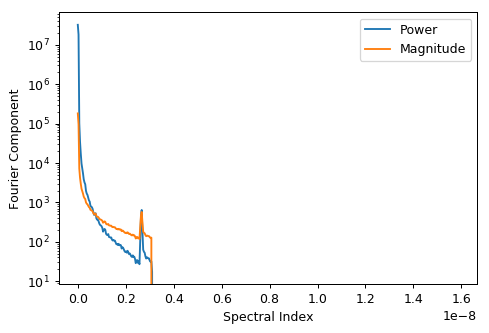

In [238]:
# plot the power spectrum

plt.plot( freqindex, powery, label="Power" )
plt.plot( freqindex, Y_abs[:step], label="Magnitude" )
plt.legend()
#plt.xlim([0,maxfreq*2])
plt.yscale('log')
plt.xlabel("Spectral Index")
plt.ylabel("Fourier Component")
plt.show()

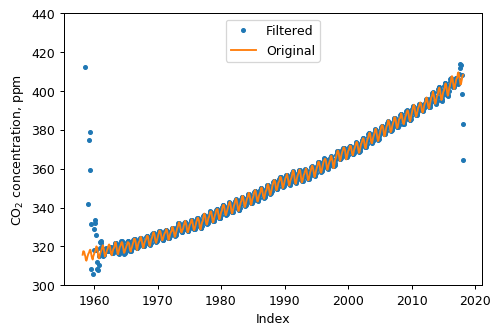

In [239]:
# plot the filtered signal with the original

plt.plot( x0, yfiltered_abs[:720], '.' ,label='Filtered' )
plt.plot( x0, y0,label='Original' )
plt.xlabel("Index")
plt.ylabel("CO$_2$ concentration, ppm")
#plt.xlim(1980,1985)
plt.ylim(300,440)
plt.legend(loc='upper center')
plt.show()

## Explanation

As the cost for windowing, the boudaries of filtered data are distorted dramatically.